##### Classification with Logistic Regression

Import Libraries

In [14]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


 Load Dataset

In [16]:
data = pd.read_csv("Iris.csv")


Logistic Regression Evaluation:
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0
ROC-AUC (macro): 1.0

Decision Tree Evaluation:
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0
ROC-AUC (macro): 1.0

Random Forest Evaluation:
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0
ROC-AUC (macro): 1.0

SVM Evaluation:
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1 Score (macro): 1.0
ROC-AUC (macro): 1.0


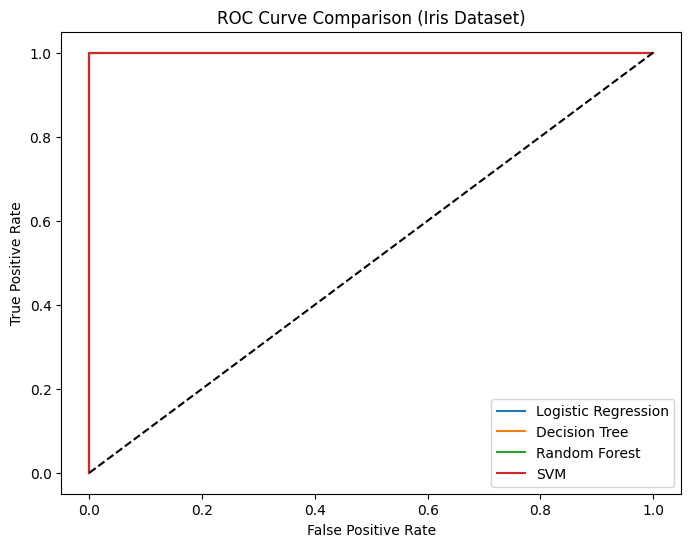

In [ ]:
# If target column is named 'Species', rename if needed
target_col = 'Species'
X = data.drop(target_col, axis=1)
y = data[target_col]

# Encode categorical target
le = LabelEncoder()
y = le.fit_transform(y)  # 0,1,2 for classes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Models
# ----------------------------
log_reg = LogisticRegression(max_iter=200)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm
}
# ----------------------------


# Training and Evaluation
# ----------------------------
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # If multi-class, binarize for ROC-AUC
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    y_prob = model.predict_proba(X_test)
    
    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average="macro"))
    print("Recall (macro):", recall_score(y_test, y_pred, average="macro"))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average="macro"))
    print("ROC-AUC (macro):", roc_auc_score(y_test_bin, y_prob, multi_class="ovr"))

    return y_test_bin, y_prob
#------------------------------


# Evaluate all models
roc_results = {}
for name, model in models.items():
    y_test_bin, y_prob = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    roc_results[name] = (y_test_bin, y_prob)


# ROC Curve Comparison
# ----------------------------
plt.figure(figsize=(8,6))

for name, (y_test_bin, y_prob) in roc_results.items():
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Iris Dataset)")
plt.legend()
plt.show()
# ----------------------------